In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("pollinator_activity_dataset (2).csv")

In [3]:
df.head()

,Temperature,Humidity,WindSpeed,LightIntensity,FlowerDensity,PollenAvailability,Region,TimeOfDay,PollinatorActivity
0,30.48,48.64,4.61,656.97,56.97,26.71,Rural,Afternoon,Medium
1,27.31,48.20,6.47,690.20,55.67,25.12,Forest,Morning,High
2,31.24,28.07,5.01,719.29,31.27,20.69,Forest,Morning,High
3,35.62,50.05,8.55,984.06,61.59,24.97,Forest,Afternoon,High
4,26.83,65.99,13.99,475.83,20.20,29.91,Rural,Evening,Low


In [4]:
%pip install xgboost



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         5000 non-null   float64
 1   Humidity            5000 non-null   float64
 2   WindSpeed           5000 non-null   float64
 3   LightIntensity      5000 non-null   float64
 4   FlowerDensity       5000 non-null   float64
 5   PollenAvailability  5000 non-null   float64
 6   Region              5000 non-null   object 
 7   TimeOfDay           5000 non-null   object 
 8   PollinatorActivity  5000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 351.7+ KB


In [6]:
df.describe()

,Temperature,Humidity,WindSpeed,LightIntensity,FlowerDensity,PollenAvailability
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,28.013188,54.851706,8.172648,701.579136,49.761486,24.930598
std,4.941281,14.864441,4.744116,281.111970,19.236929,9.899240
min,11.790000,20.000000,0.000000,100.000000,10.000000,0.000000
25%,24.710000,44.700000,4.697500,500.592500,35.967500,18.010000
50%,28.070000,54.735000,8.050000,705.780000,49.840000,24.990000
75%,31.330000,65.155000,11.380000,911.987500,63.010000,31.772500
max,40.000000,90.000000,25.000000,1200.000000,100.000000,50.000000


In [7]:
df["PollinatorActivity"].value_counts()

PollinatorActivity
Medium    3079
High      1254
Low        667
Name: count, dtype: int64

<Axes: xlabel='PollinatorActivity'>

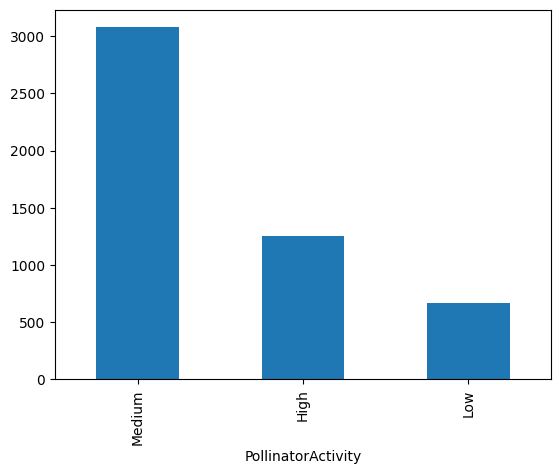

In [8]:
df['PollinatorActivity'].value_counts().plot(kind="bar")

In [9]:
df.head()

,Temperature,Humidity,WindSpeed,LightIntensity,FlowerDensity,PollenAvailability,Region,TimeOfDay,PollinatorActivity
0,30.48,48.64,4.61,656.97,56.97,26.71,Rural,Afternoon,Medium
1,27.31,48.20,6.47,690.20,55.67,25.12,Forest,Morning,High
2,31.24,28.07,5.01,719.29,31.27,20.69,Forest,Morning,High
3,35.62,50.05,8.55,984.06,61.59,24.97,Forest,Afternoon,High
4,26.83,65.99,13.99,475.83,20.20,29.91,Rural,Evening,Low


In [10]:
df_encoded = pd.get_dummies(df, columns=['TimeOfDay', 'Region'])

In [11]:
df_encoded

,Temperature,Humidity,WindSpeed,LightIntensity,FlowerDensity,PollenAvailability,PollinatorActivity,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,Region_Forest,Region_Rural,Region_Urban
0,30.48,48.64,4.61,656.97,56.97,26.71,Medium,True,False,False,False,True,False
1,27.31,48.20,6.47,690.20,55.67,25.12,High,False,False,True,True,False,False
2,31.24,28.07,5.01,719.29,31.27,20.69,High,False,False,True,True,False,False
3,35.62,50.05,8.55,984.06,61.59,24.97,High,True,False,False,True,False,False
4,26.83,65.99,13.99,475.83,20.20,29.91,Low,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27.76,74.52,3.45,816.35,37.89,19.23,Medium,False,True,False,False,True,False
4996,31.56,25.02,14.19,1113.21,44.25,39.45,Medium,False,True,False,False,False,True
4997,40.00,44.42,14.56,813.51,69.36,19.99,High,True,False,False,False,False,True
4998,32.04,62.44,3.58,1200.00,62.47,6.08,High,False,False,True,True,False,False


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded["PollinatorActivity"]=le.fit_transform(df_encoded["PollinatorActivity"])

In [13]:
df_encoded

,Temperature,Humidity,WindSpeed,LightIntensity,FlowerDensity,PollenAvailability,PollinatorActivity,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,Region_Forest,Region_Rural,Region_Urban
0,30.48,48.64,4.61,656.97,56.97,26.71,2,True,False,False,False,True,False
1,27.31,48.20,6.47,690.20,55.67,25.12,0,False,False,True,True,False,False
2,31.24,28.07,5.01,719.29,31.27,20.69,0,False,False,True,True,False,False
3,35.62,50.05,8.55,984.06,61.59,24.97,0,True,False,False,True,False,False
4,26.83,65.99,13.99,475.83,20.20,29.91,1,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27.76,74.52,3.45,816.35,37.89,19.23,2,False,True,False,False,True,False
4996,31.56,25.02,14.19,1113.21,44.25,39.45,2,False,True,False,False,False,True
4997,40.00,44.42,14.56,813.51,69.36,19.99,0,True,False,False,False,False,True
4998,32.04,62.44,3.58,1200.00,62.47,6.08,0,False,False,True,True,False,False


In [14]:
df_encoded=df_encoded.astype(int)

<Axes: >

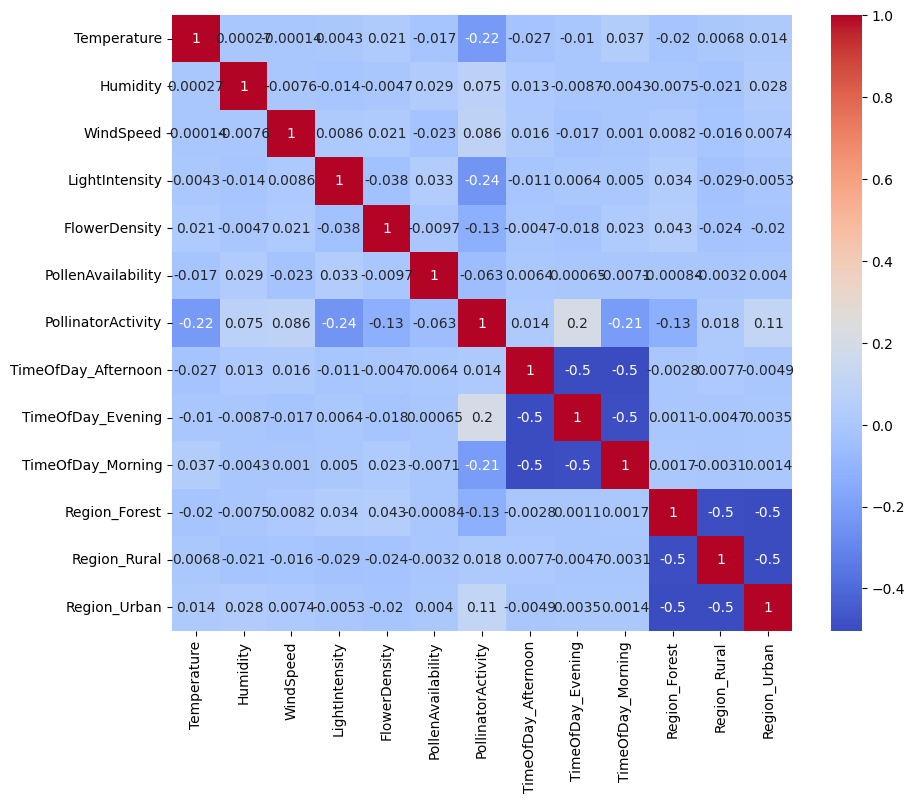

In [15]:
corr = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [16]:
df_encoded

,Temperature,Humidity,WindSpeed,LightIntensity,FlowerDensity,PollenAvailability,PollinatorActivity,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,Region_Forest,Region_Rural,Region_Urban
0,30,48,4,656,56,26,2,1,0,0,0,1,0
1,27,48,6,690,55,25,0,0,0,1,1,0,0
2,31,28,5,719,31,20,0,0,0,1,1,0,0
3,35,50,8,984,61,24,0,1,0,0,1,0,0
4,26,65,13,475,20,29,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27,74,3,816,37,19,2,0,1,0,0,1,0
4996,31,25,14,1113,44,39,2,0,1,0,0,0,1
4997,40,44,14,813,69,19,0,1,0,0,0,0,1
4998,32,62,3,1200,62,6,0,0,0,1,1,0,0


In [17]:
x=df_encoded.drop("PollinatorActivity",axis=1)
y=df_encoded["PollinatorActivity"]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [30]:

import joblib

# Recreate scaler
scaler = StandardScaler()
scaler.fit(x)   # Fit on original feature data (before train-test split)

# Save scaler
joblib.dump(scaler, "scaler_pollen.pkl")



['scaler_pollen.pkl']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [34]:
y_pred=model.predict(X_test)


In [35]:
y_pred

array([2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2,

In [36]:
accuracy_score(y_pred,y_test)

0.82

In [37]:
import joblib
joblib.dump(model,'model_pollen.pkl')
joblib.dump(scaler,'scaler_heart.pkl')
joblib.dump(x.columns.tolist(),'columns_pollen.pkl')

['columns_pollen.pkl']